In [13]:
#imprting libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
#loading data
dataset = pd.read_csv('heart.csv')

#showing data
dataset.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [15]:
#cleaning data "changing nan"
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(dataset)
dataset = imp.transform(dataset)

In [16]:
#X Data input
X = dataset[:, :-1]
print('X Data is \n' , X[:10])
print('X shape is ' , X.shape)

#y Data output
y = dataset[:, -1]
print('y Data is \n' , y[:10])
print('y shape is ' , y.shape)

X Data is 
 [[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]
 [ 57.    1.    0.  140.  192.    0.    1.  148.    0.    0.4   1.    0.
    1. ]
 [ 56.    0.    1.  140.  294.    0.    0.  153.    0.    1.3   1.    0.
    2. ]
 [ 44.    1.    1.  120.  263.    0.    1.  173.    0.    0.    2.    0.
    3. ]
 [ 52.    1.    2.  172.  199.    1.    1.  162.    0.    0.5   2.    0.
    3. ]
 [ 57.    1.    2.  150.  168.    0.    1.  174.    0.    1.6   2.    0.
    2. ]]
X shape is  (303, 13)
y Data is 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y shape is  (303,)


In [17]:
#Scaling data "rearanging data"
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print("X after rearanging data\n", X)

X after rearanging data
 [[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [18]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (203, 13)
X_test shape is  (100, 13)
y_train shape is  (203,)
y_test shape is  (100,)


In [19]:
#Applying GaussianNB Model 
#for natural data

'''
#sklearn.naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09)
'''
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB() #take opject of GaussianNB() model
GaussianNBModel.fit(X_train, y_train) #fitting X_train, y_train into GaussianNB to aplly GaussianNB algorithms on them

#Calculating Details
print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train)) #accurancy for training data
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))    #accurancy for testing data

GaussianNBModel Train Score is :  0.8325123152709359
GaussianNBModel Test Score is :  0.83


In [20]:
#Calculating Prediction
y_pred = GaussianNBModel.predict(X_test)
y_pred_prob = GaussianNBModel.predict_proba(X_test)
print('Predicted Value for GaussianNBModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for GaussianNBModel is : ' , y_pred_prob[:10])

#calculating Actual data
print('Actual Value for GaussianNBModel is : ' , y_test[:10])

Predicted Value for GaussianNBModel is :  [0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]
Prediction Probabilities Value for GaussianNBModel is :  [[9.97786666e-01 2.21333377e-03]
 [1.15083583e-01 8.84916417e-01]
 [1.69677548e-02 9.83032245e-01]
 [9.99365109e-01 6.34890688e-04]
 [8.75992335e-03 9.91240077e-01]
 [1.06420907e-02 9.89357909e-01]
 [3.95160994e-01 6.04839006e-01]
 [9.99999999e-01 9.52255080e-10]
 [9.99999632e-01 3.67676576e-07]
 [2.17347360e-01 7.82652640e-01]]
Actual Value for GaussianNBModel is :  [0. 0. 1. 0. 1. 1. 1. 0. 0. 1.]


Confusion Matrix is : 
 [[37  5]
 [12 46]]


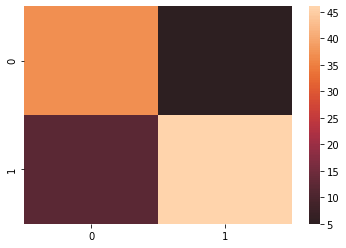

In [21]:
#Calculating Confusion Matrix

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()